In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from matplotlib.cm import viridis
from matplotlib import style
import pandas as pd
import numpy as np
import requests
import gmaps
import json
import os
import gmaps.geojson_geometries

from api_keys import g_key
import requests
from pprint import pprint
plt.style.use("seaborn")

# Rent Price vs. Population

In [2]:
rent_df = pd.read_csv("rent20-22.csv", index_col=0)

In [3]:
rent_ga = rent_df[rent_df["state"] == 13]
rent_ga

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
14,13,7,Baker County,GA,643,668.0,562.0,666,690.0,581.0,791,814.0,704.0,1031,1054.0,887.0,1151,1215.0,1036.0,3250
15,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,91520
16,13,177,Lee County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,29215
17,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,8980
18,13,321,Worth County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,20810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,651,648.0,704.0,939,927.0,870.0,998,975.0,955.0,7950
2296,13,311,White County,GA,602,619.0,693.0,606,623.0,698.0,764,763.0,827.0,1010,1006.0,1052.0,1035,1035.0,1121.0,28510
2297,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,651,648.0,704.0,811,865.0,1000.0,998,975.0,1036.0,8895
2298,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,738,740.0,784.0,939,975.0,1035.0,1132,1114.0,1154.0,9905


## Boxplot of prices between the amount of bedrooms

In [4]:
bedroom_amount = ["studio_2021", "bedroom_1_2021", "bedroom_2_2021", "bedroom_3_2021", "bedroom_4_2021"]
bedroom_quantile = []
for room in bedroom_amount:
    bedroom = rent_ga.loc[:, room]
    #quartiles = bedroom.quantile([.25, .5, .75])
    bedroom_quantile.append(bedroom.quantile([.25, .5, .75]))

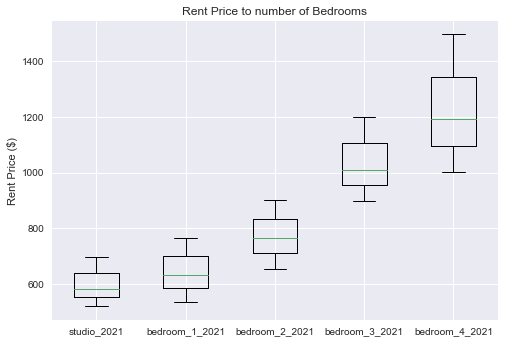

In [26]:
x_axis = np.arange(len(bedroom_amount))
tick_locations = [value + 1 for value in x_axis]
fig1, ax1 = plt.subplots()
#ax1.set_ylabel("")
ax1.boxplot(bedroom_quantile, sym = 'b')
plt.xticks(tick_locations, bedroom_amount)
plt.title("Rent Price to number of Bedrooms")
plt.ylabel("Rent Price ($)")
plt.show()

## Rent Price 2021 vs. Population Correlation Graphs

In [6]:
'''def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df'''

"def remove_outliers(df,columns,n_std):\n    for col in columns:\n        print('Working on column: {}'.format(col))\n        \n        mean = df[col].mean()\n        sd = df[col].std()\n        df = df[(df[col] <= mean+(n_std*sd))]\n        \n    return df"

R value: 0.5253005375504431


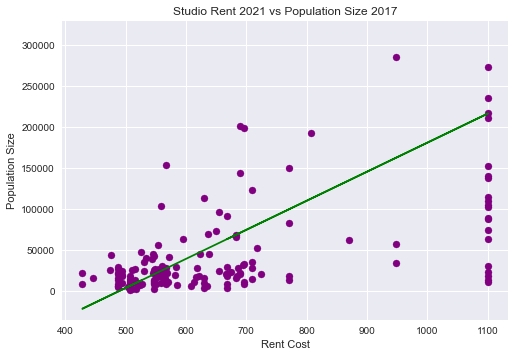

In [7]:
r = np.corrcoef(rent_ga["studio_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["studio_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["studio_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["studio_2021"], (m * rent_ga["studio_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 330000)
plt.title("Studio Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.525592772585349


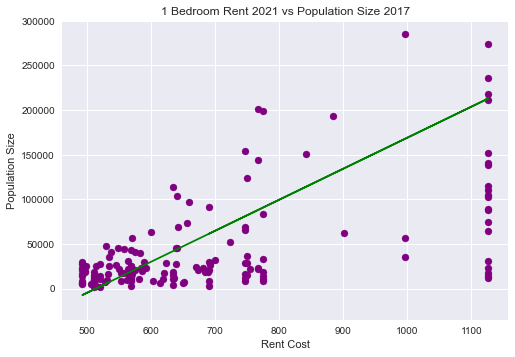

In [8]:
r = np.corrcoef(rent_ga["bedroom_1_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_1_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_1_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_1_2021"], (m * rent_ga["bedroom_1_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 300000)
plt.title("1 Bedroom Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5253140763104599


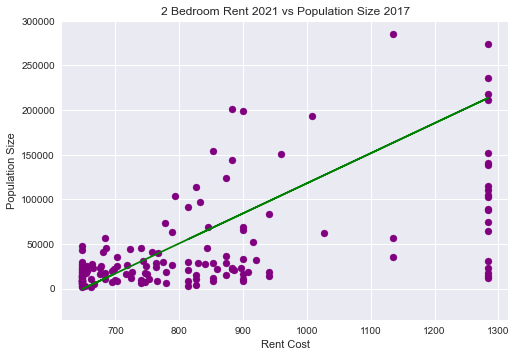

In [9]:
r = np.corrcoef(rent_ga["bedroom_2_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_2_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_2_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_2_2021"], (m * rent_ga["bedroom_2_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 300000)
plt.title("2 Bedroom Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5083381247865446


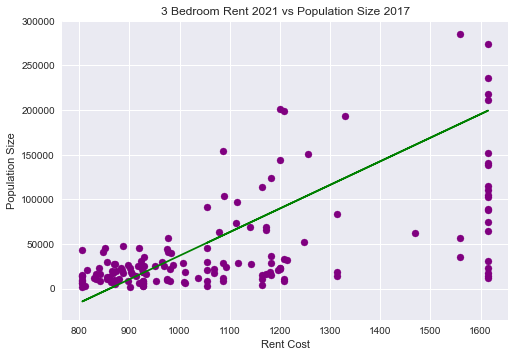

In [10]:
r = np.corrcoef(rent_ga["bedroom_3_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_3_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_3_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_3_2021"], (m * rent_ga["bedroom_3_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 300000)
plt.title("3 Bedroom Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5017811522250264


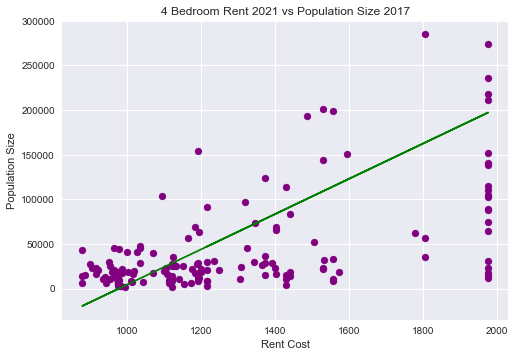

In [11]:
r = np.corrcoef(rent_ga["bedroom_4_2021"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_4_2021"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_4_2021"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_4_2021"], (m * rent_ga["bedroom_4_2021"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.ylim(bottom = -35000, top = 300000)
plt.title("4 Bedroom Rent 2021 vs Population Size 2017")
plt.grid(True)
plt.show()

### Finding coordinates for each county in dataframe

In [12]:
rent_ga["latitude"] = ""
rent_ga["longitude"] = "" 

C:\Users\cabon\AppData\Local\Temp/ipykernel_4440/599592830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_ga["latitude"] = ""
C:\Users\cabon\AppData\Local\Temp/ipykernel_4440/599592830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_ga["longitude"] = ""


In [14]:
for index, row in rent_ga.iterrows():
    
    address = f"{row['county name']}, GA"
    response = requests.get(f'https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}').json()
    
    try:
        rent_ga.loc[index,"latitude"] = response['results'][0]['geometry']['location']['lat']
        rent_ga.loc[index,"longitude"] = response['results'][0]['geometry']['location']['lng']
        
    except:
        print(f'{address} - {index} not found in API')

In [15]:
'''gmaps.configure(api_key=g_key)

locations = rent_ga[["latitude", "longitude"]]
pop = rent_ga["pop2017"]
fig = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)
heatLayer = gmaps.heatmap_layer(locations, weights=pop, max_intensity = 500000, point_radius = 20)
fig.add_layer(heatLayer)

fig'''

'gmaps.configure(api_key=g_key)\n\nlocations = rent_ga[["latitude", "longitude"]]\npop = rent_ga["pop2017"]\nfig = gmaps.figure(center=(39.8097343, -98.5556199), zoom_level=4)\nheatLayer = gmaps.heatmap_layer(locations, weights=pop, max_intensity = 500000, point_radius = 20)\nfig.add_layer(heatLayer)\n\nfig'

### Mapping with geojson

In [16]:
replacement_max = rent_ga["pop2017"].nlargest(5)
min_pop = min(rent_ga["pop2017"])
max_pop = replacement_max[1667]
pop_range = max_pop - min_pop

def calculate_color(pop):
    norm = (pop - min_pop) / pop_range

    # invert pop so that high inequality gives dark color
    inv = 1.0 - norm

    # transform the pop coefficient to a matplotlib color
    color = viridis(inv)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(color, keep_alpha=False)
    return gmaps_color

In [17]:
gmaps.configure(api_key=g_key)
county_geojson = gmaps.geojson_geometries.load_geometry('us-counties')
geojson_layer = gmaps.geojson_layer(county_geojson)
rent_ga["county"] = rent_ga["county name"].str.split('\s+').str[0]

C:\Users\cabon\AppData\Local\Temp/ipykernel_4440/3555321020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_ga["county"] = rent_ga["county name"].str.split('\s+').str[0]


In [18]:
colors = []
for feature in county_geojson['features']:
    if feature['properties']['STATE'] == '13':
        county = rent_ga[rent_ga['county'].str.contains(feature['properties']['NAME'])]
        try:
            color = calculate_color(county["pop2017"])
        except:
            color = (0, 0, 0, 0.3)
        colors.append(color)

In [19]:
ga_county = {'type': 'FeatureCollection', 'features':[]}

for feature in county_geojson['features']:
    if feature['properties']['STATE'] == '13':
        ga_county['features'].append(feature)

In [20]:
high_pop = rent_ga.sort_values("pop2017", ascending=False)
high_pop = high_pop[:5]
low_pop = rent_ga.sort_values("pop2017", ascending=True)
low_pop = low_pop[:5]
pop_lows_highs = pd.concat([high_pop, low_pop])

In [21]:
info_box_template = """
<dl>
<dt>County</dt><dd>{county}</dd>
<dt>Population</dt><dd>{pop2017}</dd>
<dt>One bedroom rent</dt><dd>${bedroom_1_2021}</dd>
</dl>
"""
pop_info = [info_box_template.format(**row) for index, row in pop_lows_highs.iterrows()]
locations = pop_lows_highs[["latitude", "longitude"]]

In [22]:
fig = gmaps.figure()
pop_layer = gmaps.geojson_layer(
    ga_county,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
fig.add_layer(pop_layer)
fig.add_layer(gmaps.marker_layer(locations, info_box_content = pop_info))
fig

Figure(layout=FigureLayout(height='420px'))

Cobb, Fulton, DeKalb, Gwinnett, Taliaferro, Glascock, Chatham, Quitman, Webster, Clay
